In [115]:
import numpy as np 
from IPython.display import display
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
#import scikitlearn

df = pd.read_csv('/Users/finnwethall/Downloads/credit_risk_dataset.csv')

display(df)

rows, cols = df.shape
#print(rows)

print(df.isna().sum())



,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64


In [94]:
#some preprocessing
#drop improper employment length data
#df = df[df['person_age'] > df['person_emp_length']]
#make sure loan_percent_income is defined properly
df = df[df['person_age'] < 144]
df = df[df['person_emp_length'] < 123]

#fillna columns
df['person_emp_length'].fillna(df['person_emp_length'].mean())
df['loan_int_rate'].fillna(df['loan_int_rate'].mean())
#print(df.isna().sum())

display(df)
unique_ownership_vals = np.unique(df['person_home_ownership'])
unique_loan_intent = np.unique(df['loan_intent'])




,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
5,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,N,2
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
5,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,N,2
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


([<matplotlib.patches.Wedge at 0x17b314b60>,
 [Text(-0.6411286268025785, 0.8938423148935389, 'EDUCATION'),
  Text(-1.0632990517318939, -0.28177140838994885, 'MEDICAL'),
  Text(-0.19142505926384218, -1.0832157895294152, 'VENTURE'),
  Text(0.8677063678765503, -0.6760811039708808, 'PERSONAL'),
  Text(1.0243555444656192, 0.4008687048430508, 'DEBTCONSOLIDATION'),
  Text(0.37471569592227355, 1.0342089475678917, 'HOMEIMPROVEMENT')],
 [Text(-0.3497065237104973, 0.4875503535782939, '19.8%'),
  Text(-0.5799813009446694, -0.15369349548542663, '18.6%'),
  Text(-0.10441366868936845, -0.5908449761069537, '17.6%'),
  Text(0.4732943824781183, -0.3687715112568441, '16.9%'),
  Text(0.5587393878903377, 0.21865565718711863, '16.0%'),
  Text(0.20439037959396736, 0.5641139714006682, '11.1%')])

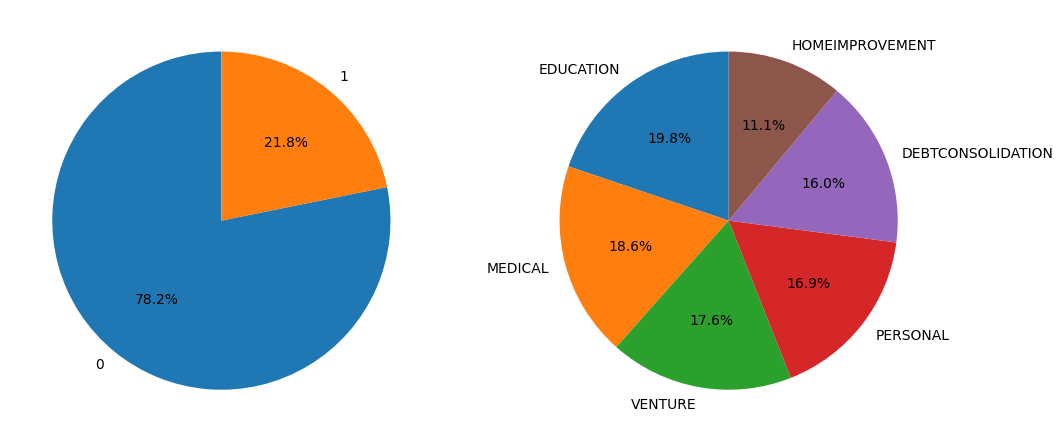

In [125]:
#EDA
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

df.groupby('loan_grade')['loan_status'].mean() #where ~1 => high default, ~0 => low default

axs[0].pie(df['loan_status'].value_counts(), labels = df['loan_status'].value_counts().index, autopct='%1.1f%%', startangle=90)

axs[1].pie(df['loan_intent'].value_counts(), labels = df['loan_intent'].value_counts().index, autopct='%1.1f%%', startangle=90)

/var/folders/nl/1f7c_4_n3qs5n0yhzmnj0qcr0000gn/T/ipykernel_85059/2140906117.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=df[col], y=df['loan_status'], estimator='mean', ci=None, hue=df[col])


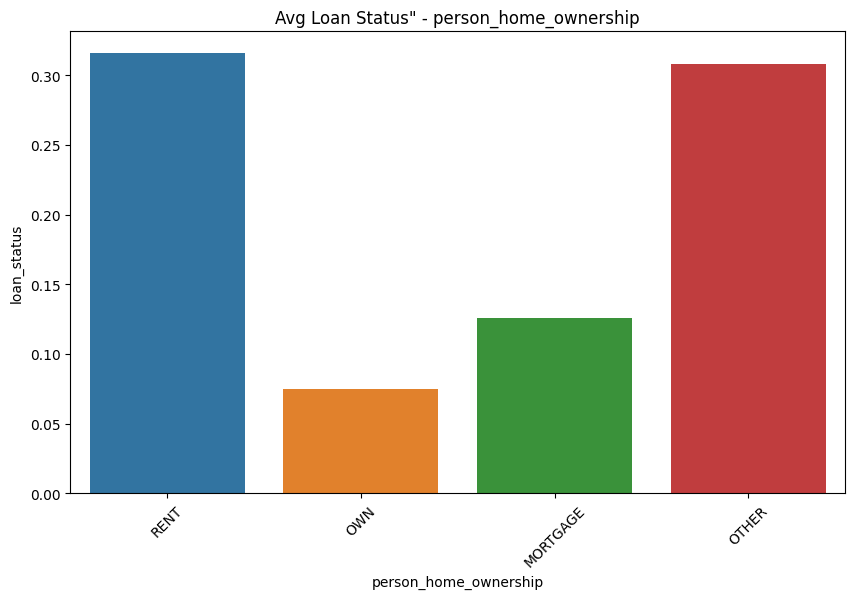

/var/folders/nl/1f7c_4_n3qs5n0yhzmnj0qcr0000gn/T/ipykernel_85059/2140906117.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=df[col], y=df['loan_status'], estimator='mean', ci=None, hue=df[col])


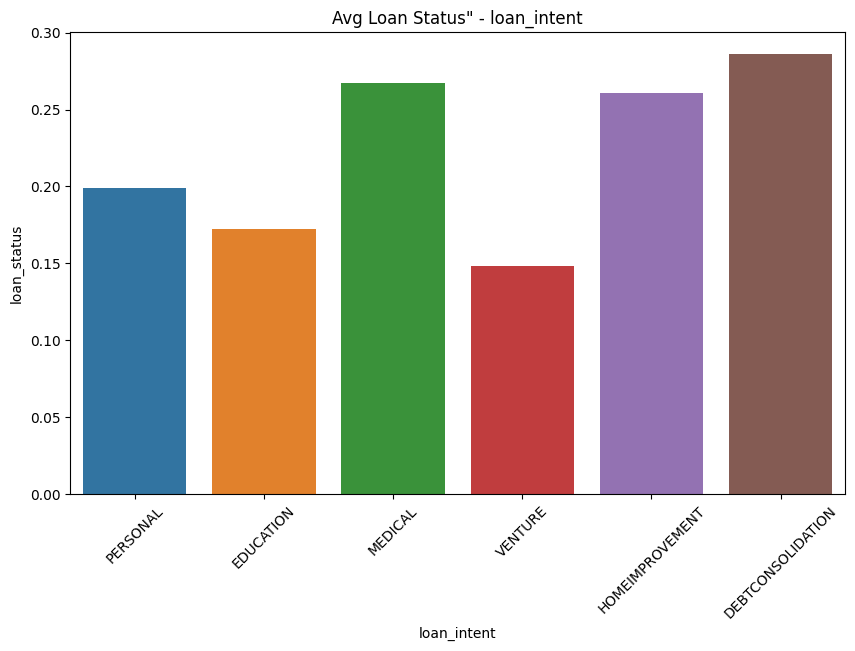

/var/folders/nl/1f7c_4_n3qs5n0yhzmnj0qcr0000gn/T/ipykernel_85059/2140906117.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=df[col], y=df['loan_status'], estimator='mean', ci=None, hue=df[col])


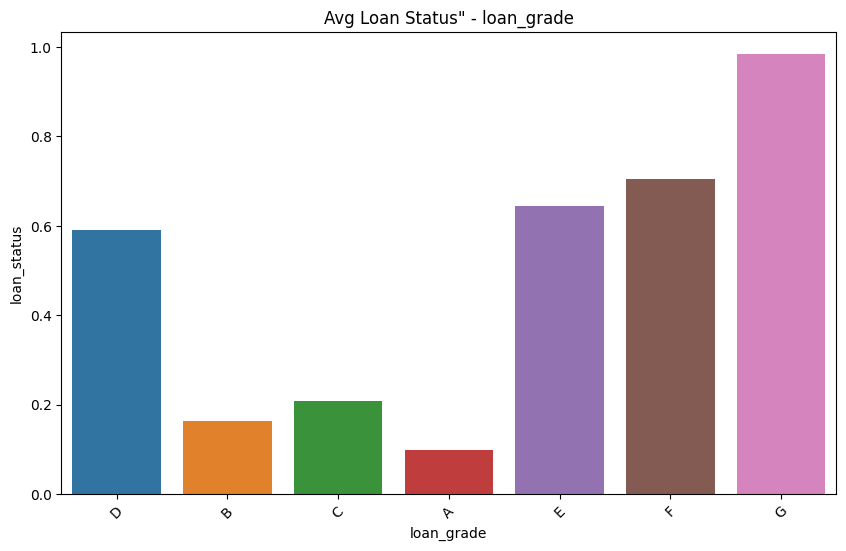

/var/folders/nl/1f7c_4_n3qs5n0yhzmnj0qcr0000gn/T/ipykernel_85059/2140906117.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=df[col], y=df['loan_status'], estimator='mean', ci=None, hue=df[col])


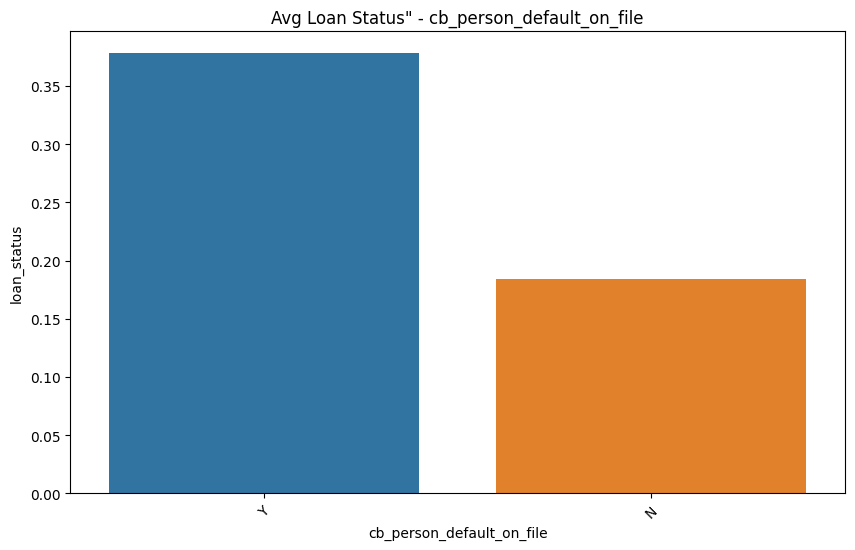

In [123]:
#EDA for cat data

category_cols = [col for col in df.columns if df[col].dtype == 'object']
for col in category_cols:
    plt.figure(figsize=(10, 6))

    sns.barplot(x=df[col], y=df['loan_status'], estimator='mean', ci=None, hue=df[col])

    plt.title(f'Avg Loan Status" - {col}')
    plt.xticks(rotation=45)
    plt.show()


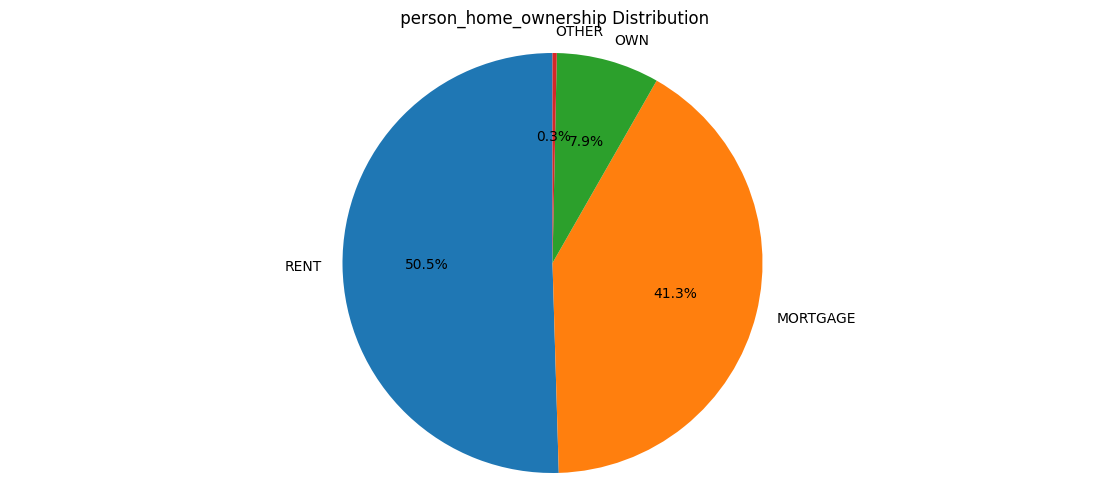

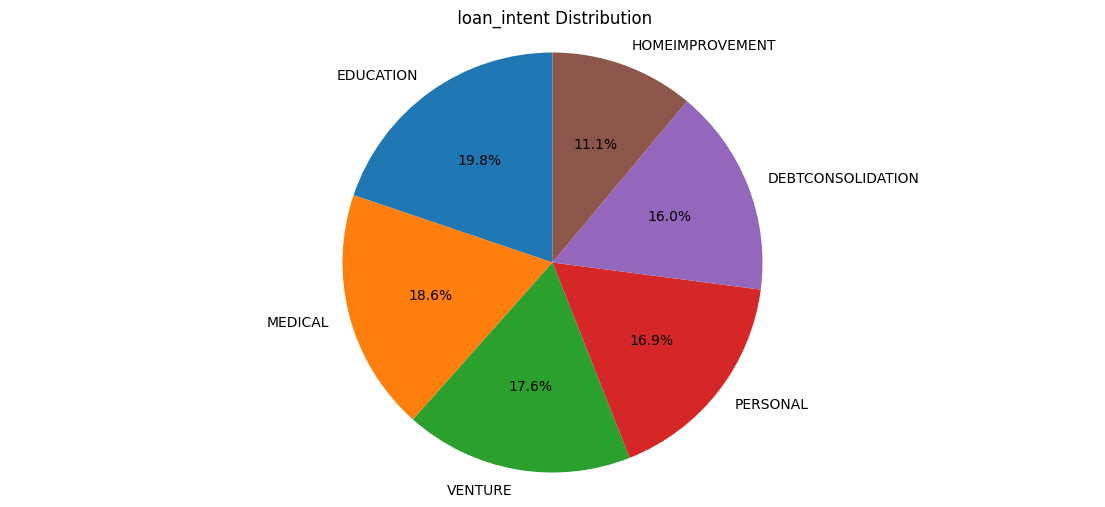

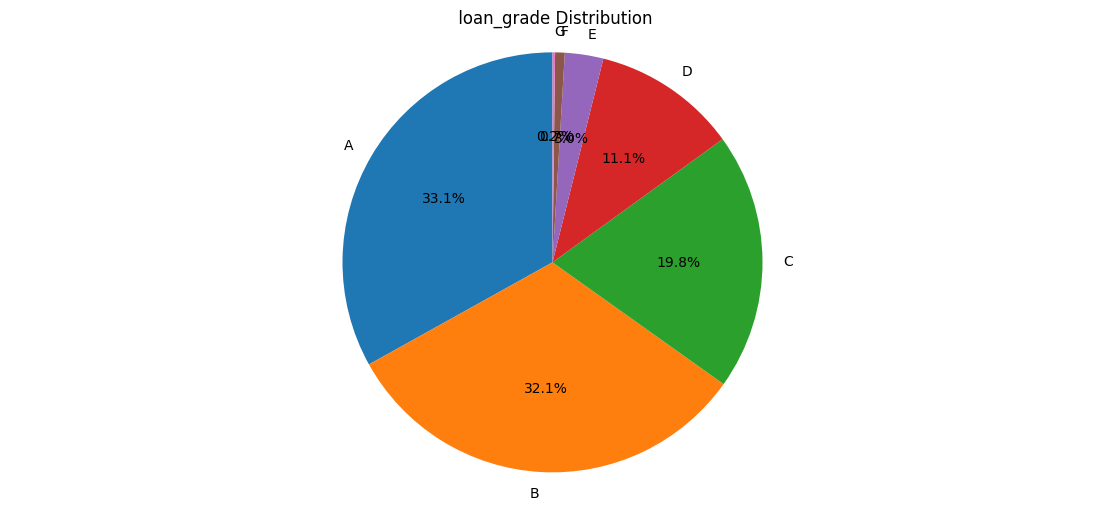

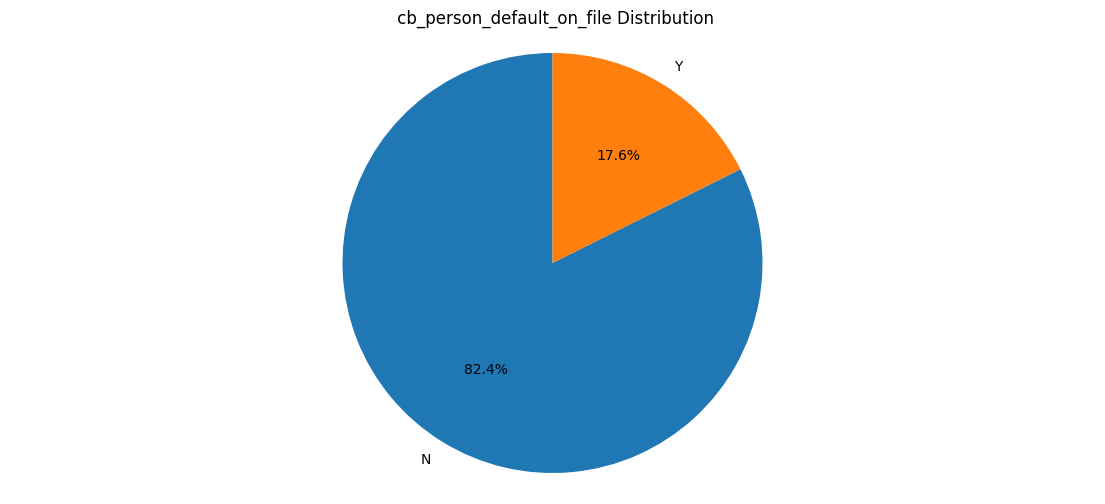

In [145]:
#EDA for cat contd. 

for col in category_cols:
    fig, axs = plt.subplots(1, 1, figsize=(14, 6))
    
    axs.pie(df[col].value_counts(), labels=df[col].value_counts().index,autopct='%1.1f%%', startangle=90)
    axs.set_title(f' {col} Distribution')
    axs.axis('equal')  
    plt.show()
    
    


In [147]:
display(df)

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


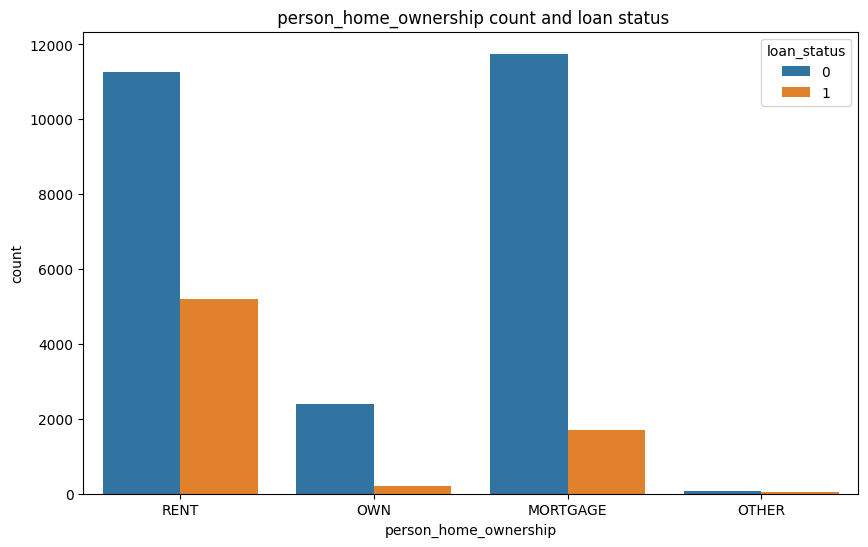

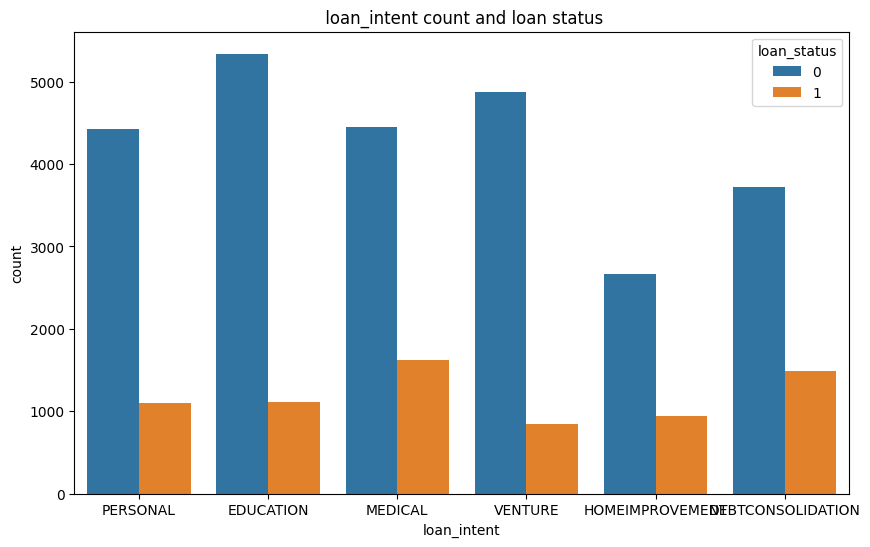

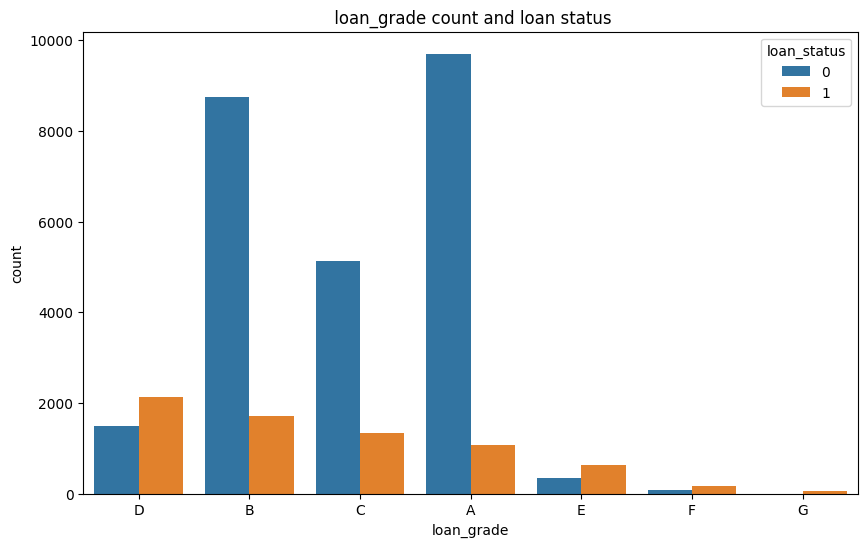

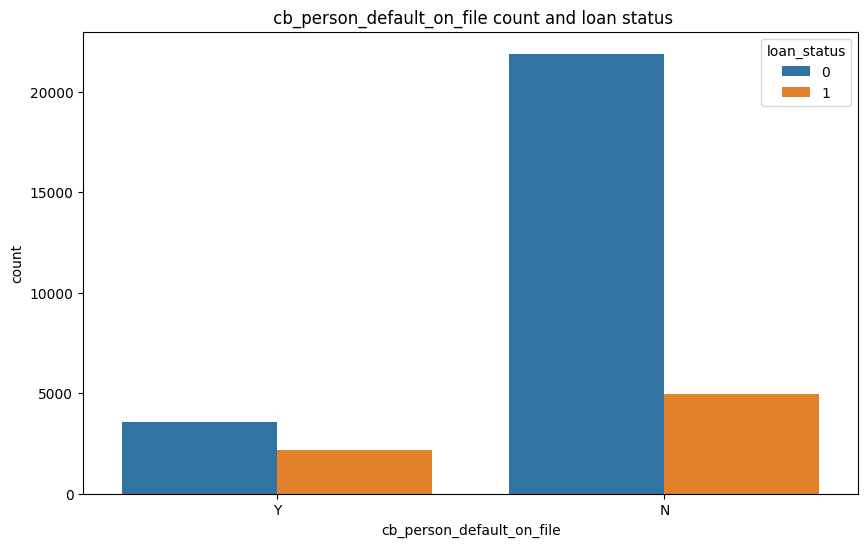

In [165]:
df.groupby('loan_grade')['loan_amnt'].mean()


for col in category_cols:

    plt.figure(figsize=(10, 6))

    sns.countplot(data=df, x=col, hue='loan_status')
    plt.title(f' {col} count and loan status')
    plt.show()

    

In [171]:
#EDA for numeric Columns


num_cols = [col for col in df.columns if df[col].dtype != 'object']
nums_to_drop = ["id","loan_status"]
num_cols  = [col for col in num_cols if col not in nums_to_drop]

df[num_cols]

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length
0,22,59000,123.0,35000,16.02,0.59,3
1,21,9600,5.0,1000,11.14,0.10,2
2,25,9600,1.0,5500,12.87,0.57,3
3,23,65500,4.0,35000,15.23,0.53,2
4,24,54400,8.0,35000,14.27,0.55,4
...,...,...,...,...,...,...,...
32576,57,53000,1.0,5800,13.16,0.11,30
32577,54,120000,4.0,17625,7.49,0.15,19
32578,65,76000,3.0,35000,10.99,0.46,28
32579,56,150000,5.0,15000,11.48,0.10,26
